In [0]:
import random
import matplotlib.pyplot as plt

In [0]:
nc, nr = 40,40
states = []
share_0 = 0.3 # 30%
share_1 = 1.0 # 70%
for r in range(nr):
  row = []
  for c in range(nc):
    f = random.random()
    if f<share_0:
      state = 0
    elif f<share_1:
      state = 1
    row.append(state)
  states.append(row)

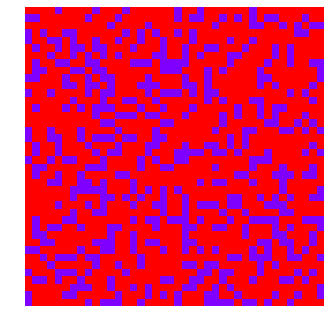

In [3]:
# display as image
plt.axis('off')
plt.grid(False)
plt.imshow(states,cmap='rainbow')

Edsger W. Dijkstra's shortest path algorithm: https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm

In [0]:
def dijkstra(occ_map, start, goal):
    # https://en.wikipedia.org/wiki/Von_Neumann_neighborhood
    directions = [(1,0),(-1,0),(0,1),(0,-1)]
    goal_found = False

    possible_nodes = [[ 0 for x in range(nc)] for y in range(nr)]
    dist_map =       [[-1 for x in range(nc)] for y in range(nr)]

    current_x, current_y = start
    possible_nodes[current_y][current_x] = 5 # somewhat arbitrary number, good for plotting with matplotlib
    dist_map[current_y][current_x] = 0

    g_value = 0
    frontier_nodes = [(g_value, current_x, current_y)] # dist, x, y
    # searched_nodes = []
    parent_node = {}  # Dictionary that Maps {child node : parent node}

    while len(frontier_nodes) != 0:
        frontier_nodes.sort(reverse=True) #sort from shortest distance to farthest
        current_node = frontier_nodes.pop()
        if current_node[1] == goal[0] and current_node[2] == goal[1]:
            # print "Goal found!"
            goal_found = True
            break
        g_value, current_x, current_y = current_node
        dist_map[current_y][current_x] = g_value

        for di in directions:
            possible_expansion_x = current_x + di[0]
            possible_expansion_y = current_y + di[1]

            if 0<=possible_expansion_x<nc and 0<=possible_expansion_y<nr:
                try:
                    unsearched_node = possible_nodes[possible_expansion_y][possible_expansion_x] == 0
                    open_node = occ_map[possible_expansion_y][possible_expansion_x] == 1
                except:
                    unsearched_node = False
                    open_node = False
                if unsearched_node and open_node:
                    possible_nodes[possible_expansion_y][possible_expansion_x] = 3
                    cost = 1
                    possible_node = (g_value + cost, possible_expansion_x, possible_expansion_y)
                    frontier_nodes.append(possible_node)
                    parent_node[possible_node] = current_node

    if goal_found:
        # print "Generating path..."
        route = []
        route.append((g_value,goal[0],goal[1]))
        child_node = current_node
        while child_node in parent_node:
            route.append(parent_node[child_node])
            child_node = parent_node[child_node]
            #route.sort()
        route.reverse()

        return dist_map, route

    else:
        #print "goal not found"
        return dist_map, None

In [0]:
start = (20,1)
goal = (nc-2, nr-2)
# dijkstra returns the distance map (dm) and the path (if found) as tuples (distance, column, row)
dm,pth = dijkstra(states, start, goal)

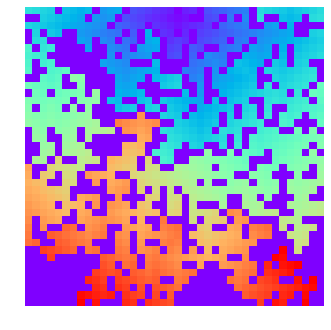

In [6]:
# display as image
plt.axis('off')
plt.grid(False)
plt.imshow(dm,cmap='rainbow')

In [7]:
# prints the path as tuple of (distance, column, row)
print(pth)

[(0, 20, 1), (1, 20, 2), (2, 21, 2), (3, 22, 2), (4, 23, 2), (5, 23, 3), (6, 23, 4), (7, 23, 5), (8, 22, 5), (9, 22, 6), (10, 22, 7), (11, 22, 8), (12, 22, 9), (13, 23, 9), (14, 23, 10), (15, 23, 11), (16, 23, 12), (17, 23, 13), (18, 24, 13), (19, 25, 13), (20, 26, 13), (21, 27, 13), (22, 27, 14), (23, 27, 15), (24, 28, 15), (25, 29, 15), (26, 30, 15), (27, 31, 15), (28, 31, 16), (29, 31, 17), (30, 30, 17), (31, 30, 18), (32, 30, 19), (33, 29, 19), (34, 29, 20), (35, 28, 20), (36, 27, 20), (37, 26, 20), (38, 25, 20), (39, 24, 20), (40, 23, 20), (41, 22, 20), (42, 22, 21), (43, 22, 22), (44, 22, 23), (45, 22, 24), (46, 22, 25), (47, 22, 26), (48, 22, 27), (49, 23, 27), (50, 24, 27), (51, 24, 28), (52, 24, 29), (53, 24, 30), (54, 24, 31), (55, 24, 32), (56, 24, 33), (57, 25, 33), (58, 26, 33), (59, 26, 34), (60, 27, 34), (61, 28, 34), (62, 28, 35), (63, 28, 36), (64, 28, 37), (65, 29, 37), (66, 30, 37), (67, 31, 37), (68, 32, 37), (69, 33, 37), (70, 34, 37), (71, 35, 37), (72, 36, 37), (